# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

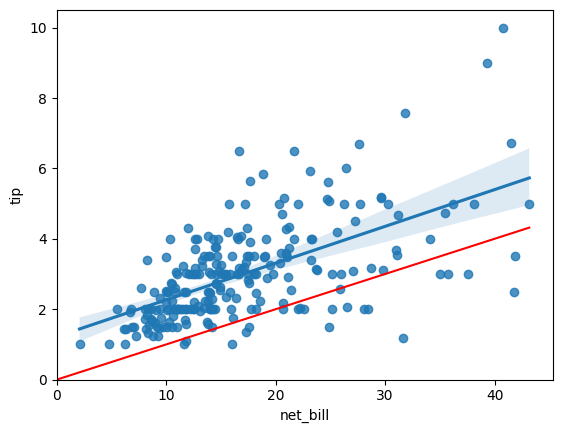

In [4]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.52e-06
Time:                        15:42:59   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

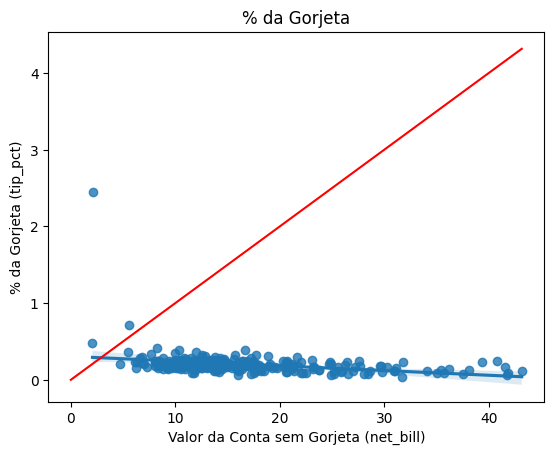

In [7]:
# Ajustando o modelo de regressão
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Resumo do modelo (visto em aula)
print(reg_tip_pct.summary())

# Gráfico de dispersão com linha de regressão
sns.regplot(y='tip_pct', x='net_bill', data=tips)

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Adicionando título e rótulos ao gráfico
plt.title("% da Gorjeta")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("% da Gorjeta (tip_pct)")

# Exibindo o gráfico
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Resposta:

**Gráfico 1:** Relação linear forte entre tip e net_bill, com R² alto.

**Gráfico 2:** Relação fraca entre tip_pct e net_bill, com R² baixo.

Não podemos comparar o R² diretamente devido à diferença nas variáveis dependentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [9]:
# 1: Obter os valores preditos de tip_pct
pred_tip_pct = reg_tip_pct.fittedvalues

# 2: Calcular o valor predito de tip
pred_tip = pred_tip_pct * tips['net_bill']

# 3: Calcular o R² para tip

# Soma dos resíduos ao quadrado
ss_res = ((tips['tip'] - pred_tip) ** 2).sum()

# Soma total ao quadrado
ss_tot = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()

# R² para tip
r2_tip = 1 - (ss_res / ss_tot)

# Exibir o R² para tip
print(f"R² para 'tip' usando o modelo ajustado para 'tip_pct': {r2_tip:.4f}")

# Passo 4: Comparar com o R² do item 1
r2_item1 = 0.333  # R² fornecido no item 1
print(f"R² do modelo ajustado diretamente para 'tip': {r2_item1:.4f}")
print(f"Diferença entre os R²: {abs(r2_tip - r2_item1):.4f}") # Usar abs para garantir que o valor seja positivo


R² para 'tip' usando o modelo ajustado para 'tip_pct': 0.1089
R² do modelo ajustado diretamente para 'tip': 0.3330
Diferença entre os R²: 0.2241
